In [107]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from scipy.stats import entropy as scipy_entropy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.optimize import linear_sum_assignment as linear_assignment
import time

In [108]:
# Load the "sizes3" dataset
sizes3_data = pd.read_csv('D:\\TEST3\\sizes3.csv')

In [109]:
# 開始計時
start_time = time.time()

In [110]:
# 執行階層式分群
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# 使用 linkage 創建群聚鏈接
linked_sizes3 = linkage(sizes3_data.drop('class', axis=1), 'ward')

# 使用 fcluster 從 linkage 結果中形成群組
hc_labels = fcluster(linked_sizes3, t=4, criterion='maxclust')

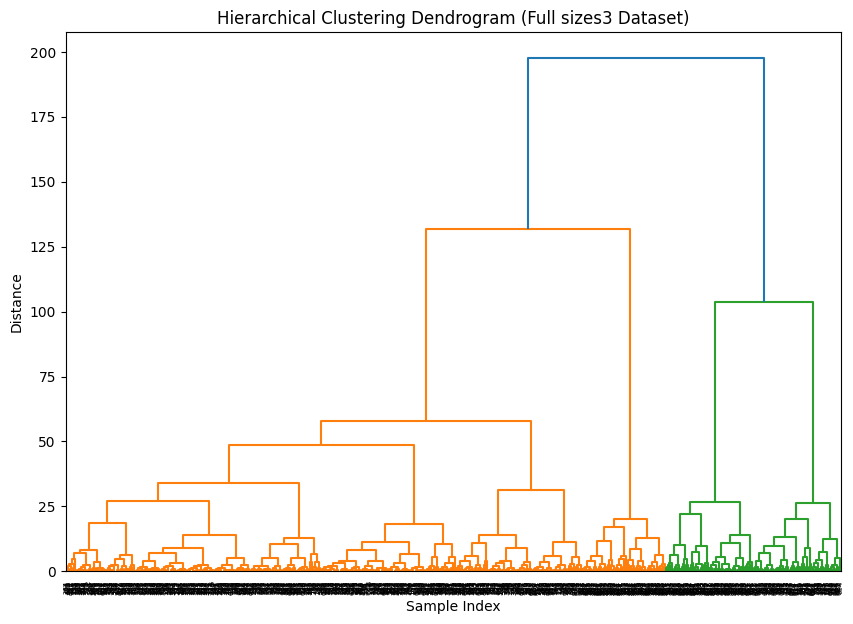

In [111]:
# 繪製樹狀圖
plt.figure(figsize=(10, 7))
dendrogram(linked_sizes3, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Full sizes3 Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

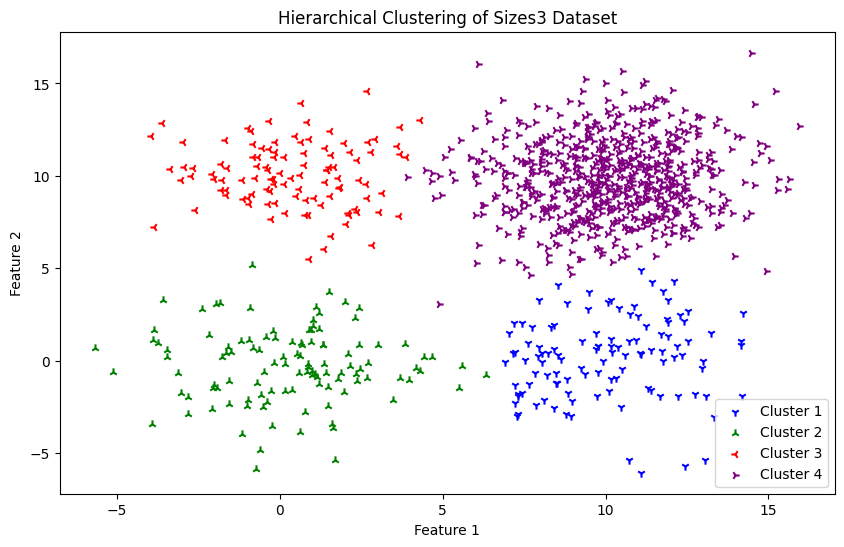

In [112]:
# 繪製群聚結果
plt.figure(figsize=(10, 6))
markers = ['1', '2', '3', '4']
colors = ['blue', 'green', 'red', 'purple']  # 每個群聚的顏色
for i in range(1, 5):
    plt.scatter(sizes3_data[hc_labels == i].iloc[:, 0], 
                sizes3_data[hc_labels == i].iloc[:, 1], 
                color=colors[i-1],
                marker=markers[i-1], 
                label=f'Cluster {i}')
plt.title('Hierarchical Clustering of Sizes3 Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [113]:
# 停止計時
end_time = time.time()

In [114]:
# 計算 SSE
centroids = [sizes3_data[hc_labels == i][['x', 'y']].mean(axis=0) for i in range(hc.n_clusters)]
sse_total = sum(np.sum(np.linalg.norm(sizes3_data[hc_labels == i][['x', 'y']] - centroids[i][['x', 'y']], axis=1)**2) for i in range(hc.n_clusters))

# 計算 ARI (Adjusted Rand Index)
ari = adjusted_rand_score(sizes3_data['class'], hc_labels)

# 計算每個群的熵，然後計算其平均值
cluster_entropy = [scipy_entropy(sizes3_data[hc_labels == i]['class'].value_counts(normalize=True)) for i in range(hc.n_clusters)]
mean_entropy = np.mean(cluster_entropy)

In [115]:
def calculate_accuracy(true_labels, predicted_labels):
    D = max(predicted_labels.max(), true_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(predicted_labels.size):
        w[predicted_labels[i], true_labels[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in zip(*ind)]) / predicted_labels.size
accuracy = calculate_accuracy(sizes3_data['class'], hc_labels)

In [116]:
# 輸出結果
print("Total SSE: ", sse_total)
print("ARI: ", ari)
print("Mean Entropy: ", mean_entropy)
print("Accuracy: ", accuracy)
print("Elapsed Time: {:.2f} seconds".format(end_time - start_time))

Total SSE:  2689.1850702940105
ARI:  0.9634075880386088
Mean Entropy:  0.08646197177991977
Accuracy:  0.986
Elapsed Time: 6.40 seconds
